### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 3


### Дисциплина: Методы машинного обучения

## Москва 2024
***

##### Студент:  Артамонов Т.Е.
##### Группа:   НКНбд-01-21

Контрольная работа 3. Вариант 7.
1. Функция одной переменной f(x) = (2*x + 1)*cos(2*x) на отрезке [0, 1]
2. Порядок производной функции одной переменной 3
3. Функция двух переменных f(x, y) = (x^2 + y^2)*ln(1 + x + y) в области [0,2] х [0, 2]
4. Порядок смешанной производной функции двух переменных dz3/dxd2y
5. Показатель качества регрессии: среднее квадратичное логарифмическое отклонение (MSLE)

### Задание 1
Постройте тензор ранга 1 (вектор) со значениями заданной в индивидуальном задании функции одной переменной на заданном в индивидуальном задании отрезке и определите максимальное и минимальное значения функции.

### Решение
Импортируем библиотеки

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Задаем функцию

In [2]:
f = lambda x: (2*x + 1)*tf.cos(2*x)

Задаем отрезок и применяем к нему функцию, получая тензор

In [3]:
x = tf.Variable(np.linspace(0, 1, 100))
tensor = f(x)
tensor

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([ 1.        ,  1.01999384,  1.03955493,  1.0586588 ,  1.07728119,
        1.09539805,  1.11298556,  1.13002017,  1.14647857,  1.16233775,
        1.17757499,  1.19216788,  1.20609436,  1.21933268,  1.23186149,
        1.2436598 ,  1.25470699,  1.26498288,  1.27446769,  1.28314209,
        1.29098717,  1.29798452,  1.30411619,  1.30936471,  1.31371313,
        1.31714501,  1.31964444,  1.32119604,  1.32178502,  1.32139711,
        1.32001865,  1.31763655,  1.31423832,  1.3098121 ,  1.30434663,
        1.29783129,  1.29025608,  1.28161169,  1.27188942,  1.26108127,
        1.2491799 ,  1.23617866,  1.22207158,  1.2068534 ,  1.19051954,
        1.17306616,  1.15449011,  1.13478898,  1.11396108,  1.09200543,
        1.06892183,  1.04471077,  1.01937351,  0.99291205,  0.96532913,
        0.93662827,  0.90681369,  0.87589042,  0.84386419,  0.81074153,
        0.77652969,  0.74123669,  0.70487132,  0.66744308,  0.62896225,
        0.589439

Получаем максимальное и минимальное значения

In [4]:
max(tensor).numpy(), min(tensor).numpy()

(1.3217850184780702, -1.2484405096414273)

### Задание 2
Постройте график функции с прямыми, соответствующими максимальному и минимальному значениям, подписывая оси и рисунок и создавая легенду.

### Решение
Построим график

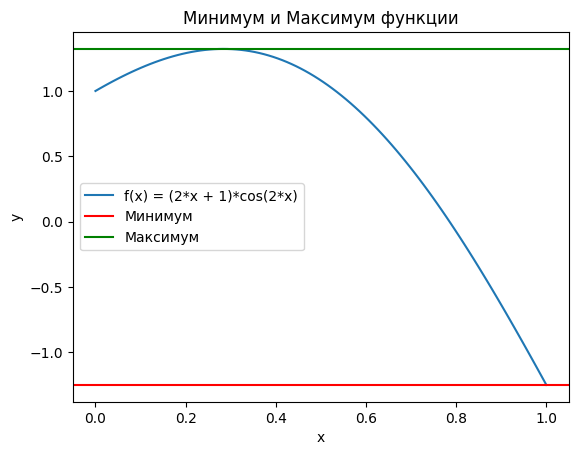

In [5]:
plt.plot(x, tensor, label = "f(x) = (2*x + 1)*cos(2*x)")
plt.axhline(min(tensor), color='r', label = "Минимум")
plt.axhline(max(tensor), color='g', label = "Максимум")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Минимум и Максимум функции")
plt.legend();

### Задание 3
Найдите значения производной от функции порядка, указанного в индивидуальном задании, и постройте график полученной функции, подписывая оси и рисунок.

### Решение
Считаем третью производную с помощтю нескольких лент tf.GradientTape()

In [6]:
with tf.GradientTape() as gt1:
    gt1.watch(x)
    with tf.GradientTape() as gt2:
        gt2.watch(x)
        with tf.GradientTape() as gt3:
            gt3.watch(x)
            y = f(x)
        dydx = gt3.gradient(y, x)     
    d2ydx2 = gt2.gradient(dydx, x)  
d3ydx3 = gt1.gradient(d2ydx2, x)

print(d3ydx3)

tf.Tensor(
[-24.         -23.83023279 -23.6442121  -23.44201786 -23.22373923
 -22.98947463 -22.73933162 -22.47342691 -22.19188631 -21.89484462
 -21.58244559 -21.25484189 -20.91219498 -20.55467508 -20.18246103
 -19.79574028 -19.39470874 -18.97957071 -18.55053877 -18.10783367
 -17.65168424 -17.18232729 -16.70000742 -16.20497699 -15.69749594
 -15.17783168 -14.64625893 -14.10305962 -13.54852273 -12.98294413
 -12.40662647 -11.81987898 -11.22301735 -10.61636355 -10.00024568
  -9.37499779  -8.74095972  -8.09847691  -7.44790028  -6.78958594
  -6.12389514  -5.45119398  -4.77185328  -4.08624835  -3.39475886
  -2.69776855  -1.99566512  -1.28883999  -0.57768809   0.13739233
   0.85599989   1.57773035   2.30217673   3.02892961   3.75757728
   4.48770599   5.21890014   5.95074255   6.68281459   7.4146965
   8.14596753   8.8762062    9.60499053  10.33189822  11.05650695
  11.7783945   12.49713907  13.21231944  13.92351523  14.63030712
  15.33227704  16.02900844  16.72008649  17.40509829  18.08363312


Построим график изменения производной

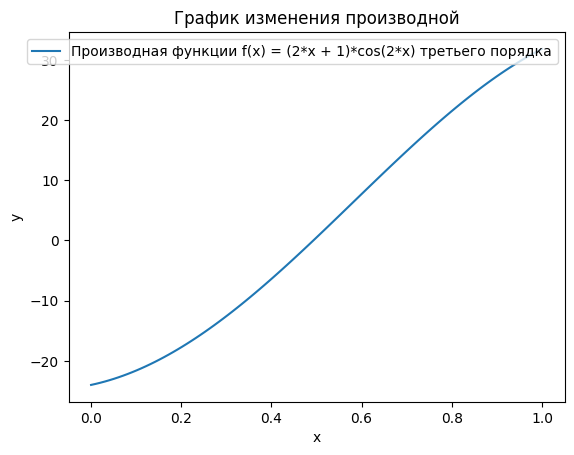

In [7]:
plt.plot(x, d3ydx3, label = "Производная функции f(x) = (2*x + 1)*cos(2*x) третьего порядка")
plt.xlabel('x')
plt.ylabel('y')
plt.title("График изменения производной")
plt.legend();

### 4 
Постройте тензор ранга 2 (матрицу) со значениями заданной в индивидуальном задании функции двух переменных на заданном в индивидуальном задании прямоугольнике и определите максимальное и минимальное значения функции. 

### Решение
Записываем функцию для двух переменных

In [8]:
f1 = lambda x, y: (x**2 + y**2)*tf.math.log(1 + x + y)

Создаём область и применяем к ней функцию, получая тензор

In [9]:
x1 = tf.Variable(np.linspace(0, 2, 100))
y1 = tf.Variable(np.linspace(0, 2, 100))
tensor1 = f1(x1, y1)
tensor1


<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([0.00000000e+00, 3.23306912e-05, 2.53717733e-04, 8.40480082e-04,
       1.95653215e-03, 3.75479325e-03, 6.37838767e-03, 9.96167296e-03,
       1.46311260e-02, 2.05061110e-02, 2.76995476e-02, 3.63184968e-02,
       4.64646743e-02, 5.82349048e-02, 7.17215242e-02, 8.70127368e-02,
       1.04192935e-01, 1.23342985e-01, 1.44540484e-01, 1.67859990e-01,
       1.93373233e-01, 2.21149303e-01, 2.51254821e-01, 2.83754101e-01,
       3.18709284e-01, 3.56180479e-01, 3.96225873e-01, 4.38901850e-01,
       4.84263087e-01, 5.32362647e-01, 5.83252070e-01, 6.36981448e-01,
       6.93599503e-01, 7.53153654e-01, 8.15690079e-01, 8.81253778e-01,
       9.49888628e-01, 1.02163743e+00, 1.09654197e+00, 1.17464304e+00,
       1.25598052e+00, 1.34059338e+00, 1.42851972e+00, 1.51979683e+00,
       1.61446123e+00, 1.71254865e+00, 1.81409410e+00, 1.91913190e+00,
       2.02769568e+00, 2.13981844e+00, 2.25553254e+00, 2.37486975e+00,
       2.49786123e+00, 2.6245

Получаем максимальное и минимальное значение

In [10]:
max(tensor1).numpy(), min(tensor1).numpy()

(12.875503299472802, 0.0)

### 5 
Постройте 3D график поверхности функции двух переменных, подписывая оси и рисунок.

### Решение
Преобразуем наши данные, чтобы построить поверхность, построим график

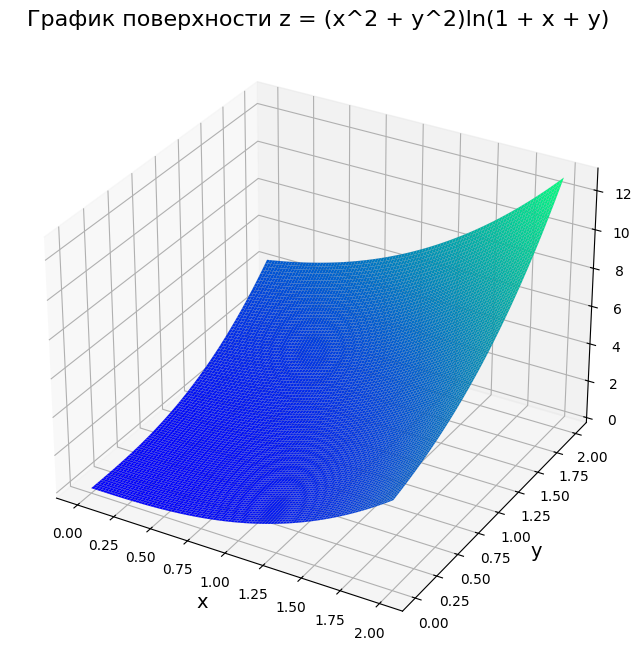

In [11]:
from matplotlib import cm
x_mesh, y_mesh = tf.meshgrid(x1, y1)
z = f1(x_mesh, y_mesh)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x_mesh, y_mesh, z, edgecolors='gray', cmap=cm.winter, antialiased=True,rstride=1, cstride=1, linewidth=0.05)
#ax.scatter(x, y, z, s=100, c='r' )

ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14)
ax.set_title("График поверхности z = (x^2 + y^2)ln(1 + x + y)", fontsize=16);


### Задание 6
Найдите значения смешанной производной от функции порядка, указанного в индивидуальном задании, и постройте 30 график поверхности полученной функции, подписывая оси и рисунок.

### Решение
Напишем функцию, которая считает смешанную производную 3-порядка из задания

In [12]:
def gradient(x, y):
    with tf.GradientTape() as gt1:
        gt1.watch(y)
        with tf.GradientTape() as gt2:
            gt2.watch(y)
            with tf.GradientTape() as gt3:
                gt3.watch(x)
                z = f1(x, y)
            dz1 = gt3.gradient(z, x)     
        dz2 = gt2.gradient(dz1, y)  
    dz3 = gt1.gradient(dz2, y)
    return dz3



dz3 = gradient(x1, y1)

print(dz3)

tf.Tensor(
[2.         1.81179929 1.64811031 1.50494541 1.37908375 1.26790291
 1.16925175 1.08135344 1.00273076 0.93214815 0.86856624 0.81110605
 0.75902048 0.71167147 0.6685117  0.62906963 0.59293743 0.55976097
 0.52923167 0.5010797  0.47506834 0.45098929 0.42865866 0.40791369
 0.38860992 0.37061878 0.35382557 0.33812772 0.32343329 0.30965968
 0.29673253 0.28458478 0.27315579 0.26239067 0.2522396  0.24265731
 0.2336026  0.22503788 0.21692883 0.20924405 0.20195477 0.19503462
 0.18845935 0.18220666 0.176256   0.17058843 0.16518646 0.16003391
 0.1551158  0.15041826 0.14592843 0.14163434 0.13752489 0.13358973
 0.12981924 0.12620444 0.12273693 0.11940891 0.11621304 0.11314248
 0.11019082 0.10735204 0.10462051 0.10199093 0.09945833 0.09701805
 0.09466566 0.09239705 0.0902083  0.08809574 0.0860559  0.0840855
 0.08218144 0.08034081 0.07856083 0.07683888 0.0751725  0.07355932
 0.07199712 0.07048379 0.06901732 0.06759581 0.06621746 0.06488054
 0.06358342 0.06232454 0.06110243 0.05991568 0.05876

Адаптируем наши данные для построения поверхности

In [13]:
z_mesh = gradient(x_mesh, y_mesh)

Построим график

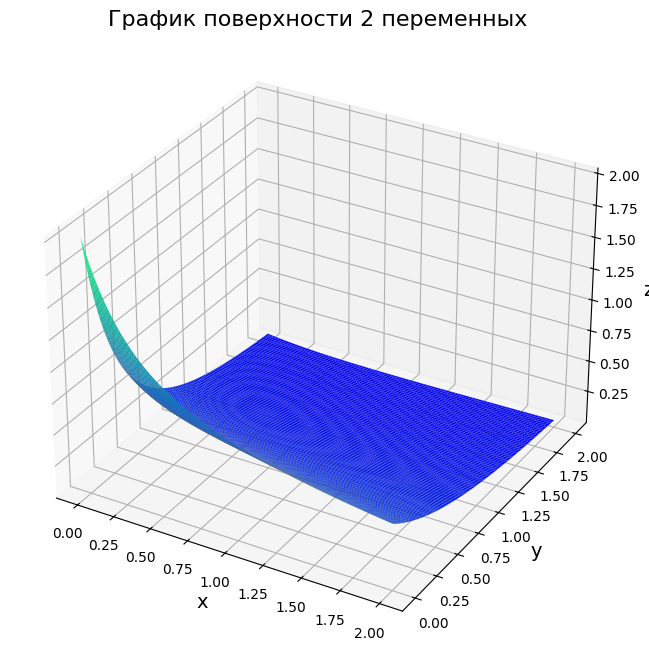

In [14]:
from matplotlib import cm
x_mesh, y_mesh = np.meshgrid(x1, y1)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, edgecolors='gray', cmap=cm.winter, antialiased=True,rstride=1, cstride=1, linewidth=0.05)
#ax.scatter(x, y, z, s=100, c='r' )

ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14)
ax.set_title("График поверхности 2 переменных", fontsize=16);

### Задание 7 
Решите задачу парной линейной регрессии при помощи модели TensorFlow, рассматривая тензор ранга 1 из пункта 1 задания как значения зависимой переменной (отклика), а точки отрезка из индивидуального задания как значения независимой переменной (предиктора). Предварительно масштабируйте независимую и зависимую переменные на интервал [0, 1]. Оцените качество полученной модели по показателю качества регрессии, указанному в индивидуальном задании. Количество эпох, скорость обучения и начальные значения весов выберите самостоятельно, обеспечивая сходимость обучения.

### Решение
Преобразуем тип данных к float32, x уже лежит в промежутке от 0 до 1, масштабируем y.

In [15]:
x = tf.convert_to_tensor(np.linspace(0, 1, 100), dtype='float32')

In [16]:
y = tf.cast(tensor, tf.float32)

In [17]:
y = (y - np.min(y))/(np.max(y) - np.min(y))

Напишем класс Модели и создадим его экземпляр

In [18]:
class Model(object):
  def __init__(self):
    self.w = tf.Variable(abs(tf.random.normal([1])))
    self.b = tf.Variable(abs(tf.random.normal([1])))

  def __call__(self, x):
    return self.w * x + self.b

model = Model()

В качестве функции потерь используем MSLE

In [19]:
def loss(y_pred, y_true):
    return tf.math.reduce_mean(tf.square(tf.math.log(y_true + 1) - tf.math.log(y_pred + 1)))

Напишем функцию для построения на графике реальных данных и предсказания модели

In [20]:
def plot_data(inputs, outputs, predicted_outputs):
  real = plt.scatter(inputs, outputs, c='b', marker='.')
  predicted = plt.scatter(inputs, predicted_outputs, c='r', marker='+')
  plt.xlabel('Независимый признак')
  plt.ylabel('Зависимый признак')
  plt.legend((real,predicted), ('Реальные данные', 'Прогнозируемые данные'))
  plt.show()

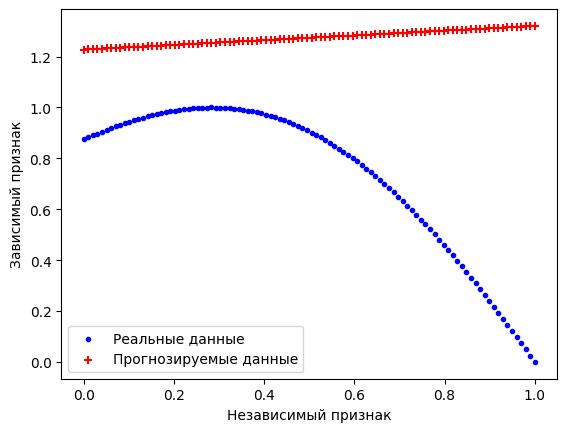

Текущие потери (ошибка): 0.122512


In [21]:
plot_data(x, y, model(x))
print('Текущие потери (ошибка): %1.6f' % loss(model(x), y))

Напишем функцию для обучения модели

In [22]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dw, db = t.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

  return current_loss.numpy()

Обучим модель, выбрали 500 эпох и скорость обучения оставили 0.1, оценим качество обучения по функции потерь

In [23]:
model = Model()
list_w, list_b = [], []
epochs = range(500)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, x, y, learning_rate=0.1)
  losses.append(current_loss)
  print('Эпоха %2d: w=%1.2f b=%1.2f, потери=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))

Эпоха  0: w=1.64 b=0.52, потери=0.23029
Эпоха  1: w=1.62 b=0.50, потери=0.22357
Эпоха  2: w=1.60 b=0.48, потери=0.21727
Эпоха  3: w=1.58 b=0.46, потери=0.21137
Эпоха  4: w=1.57 b=0.45, потери=0.20586
Эпоха  5: w=1.55 b=0.43, потери=0.20071
Эпоха  6: w=1.53 b=0.41, потери=0.19591
Эпоха  7: w=1.52 b=0.40, потери=0.19144
Эпоха  8: w=1.50 b=0.39, потери=0.18727
Эпоха  9: w=1.49 b=0.38, потери=0.18339
Эпоха 10: w=1.47 b=0.36, потери=0.17978
Эпоха 11: w=1.46 b=0.35, потери=0.17642
Эпоха 12: w=1.44 b=0.34, потери=0.17328
Эпоха 13: w=1.43 b=0.33, потери=0.17035
Эпоха 14: w=1.41 b=0.33, потери=0.16762
Эпоха 15: w=1.40 b=0.32, потери=0.16506
Эпоха 16: w=1.38 b=0.31, потери=0.16267
Эпоха 17: w=1.37 b=0.30, потери=0.16041
Эпоха 18: w=1.36 b=0.30, потери=0.15829
Эпоха 19: w=1.34 b=0.29, потери=0.15629
Эпоха 20: w=1.33 b=0.29, потери=0.15439
Эпоха 21: w=1.32 b=0.28, потери=0.15259
Эпоха 22: w=1.31 b=0.28, потери=0.15087
Эпоха 23: w=1.29 b=0.28, потери=0.14923
Эпоха 24: w=1.28 b=0.27, потери=0.14766


C:\Users\artam\AppData\Local\Temp\ipykernel_22492\2162949723.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Эпоха %2d: w=%1.2f b=%1.2f, потери=%2.5f' %


Эпоха 63: w=0.88 b=0.32, потери=0.10587
Эпоха 64: w=0.88 b=0.32, потери=0.10502
Эпоха 65: w=0.87 b=0.33, потери=0.10417
Эпоха 66: w=0.86 b=0.33, потери=0.10333
Эпоха 67: w=0.85 b=0.33, потери=0.10250
Эпоха 68: w=0.84 b=0.34, потери=0.10167
Эпоха 69: w=0.83 b=0.34, потери=0.10085
Эпоха 70: w=0.82 b=0.34, потери=0.10004
Эпоха 71: w=0.82 b=0.34, потери=0.09923
Эпоха 72: w=0.81 b=0.35, потери=0.09843
Эпоха 73: w=0.80 b=0.35, потери=0.09764
Эпоха 74: w=0.79 b=0.35, потери=0.09685
Эпоха 75: w=0.78 b=0.36, потери=0.09607
Эпоха 76: w=0.77 b=0.36, потери=0.09530
Эпоха 77: w=0.77 b=0.36, потери=0.09453
Эпоха 78: w=0.76 b=0.36, потери=0.09377
Эпоха 79: w=0.75 b=0.37, потери=0.09302
Эпоха 80: w=0.74 b=0.37, потери=0.09227
Эпоха 81: w=0.73 b=0.37, потери=0.09153
Эпоха 82: w=0.72 b=0.38, потери=0.09080
Эпоха 83: w=0.72 b=0.38, потери=0.09007
Эпоха 84: w=0.71 b=0.38, потери=0.08935
Эпоха 85: w=0.70 b=0.38, потери=0.08863
Эпоха 86: w=0.69 b=0.39, потери=0.08792
Эпоха 87: w=0.68 b=0.39, потери=0.08722


Потери уменьшаются с ходом обучения, модель сходится, судя по показателю ошибки, модель достаточно точно предсказывает реальные данные

### Задание 8
Постройте кривую обучения для показателя качества регрессии, указанного в индивидуальном задании, с зависимостью от количества эпох. Показатель качества регрессия реализуйте как функцию с использованием функций модуля tf.math.

### Решение

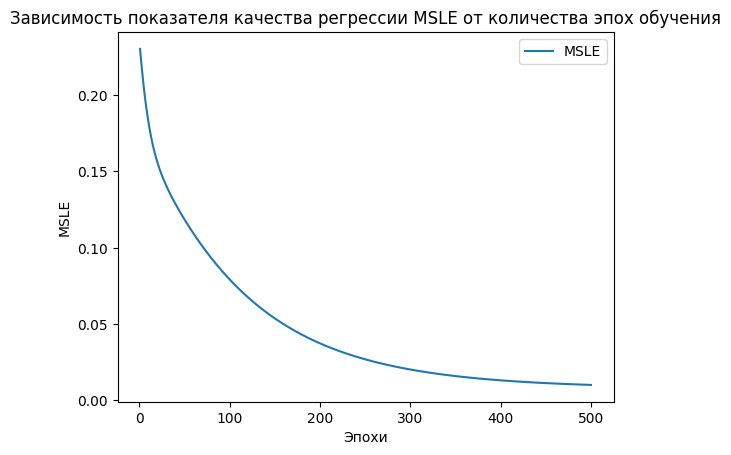

In [24]:
i = [i for i in range(1, 501)]
plt.plot(i, losses, label = "MSLE")
plt.title("Зависимость показателя качества регрессии MSLE от количества эпох обучения")
plt.xlabel("Эпохи")
plt.ylabel("MSLE")
plt.legend();

### Задание 9
Изобразите на графике точки набора данных (независимой и зависимой переменных) и линию построенной парной регрессии, подписывая оси и рисунок и создавая легенду.

### Решение

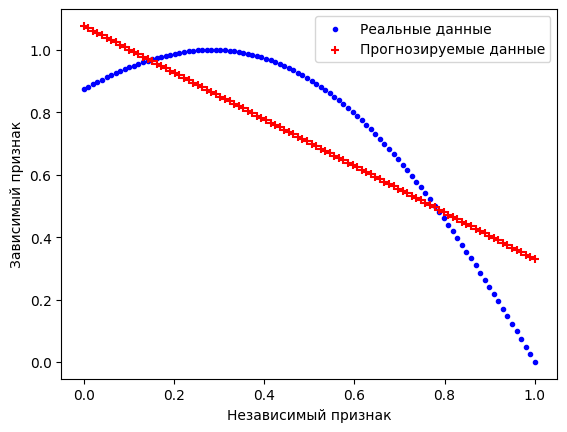

In [25]:
plot_data(x, y, model(x))